# **(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2'

Importing relevant libraries and New CSV file containing population and weather

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import sklearn as skl

df = pd.read_csv('Dataset//EDA/pollution_us_2012_2016-population-weather.csv')

In [5]:
df.head() # Displaying the first 5 rows of the dataframe

,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Population,Latitude,Longitude,tmax,prcp,wspd
0,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-01,17.716667,31.0,0,29,0.013667,...,0.336842,0.6,5,7.0,"542,649",31.9681,-111.7806,26.7,0.0,17.6
1,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-02,15.062500,30.6,18,28,0.015083,...,0.225000,0.4,23,5.0,"542,649",31.9681,-111.7806,24.4,0.0,27.4
2,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-03,21.643478,31.0,18,29,0.011417,...,0.295833,0.4,0,5.0,"542,649",31.9681,-111.7806,26.1,0.0,10.8
3,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-04,25.041668,37.8,10,35,0.009208,...,0.345833,0.5,12,6.0,"542,649",31.9681,-111.7806,24.4,0.0,9.0
4,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-05,21.981817,37.1,17,35,0.013042,...,0.291667,0.6,23,7.0,"542,649",31.9681,-111.7806,23.9,0.0,9.7


In [6]:
df.info() # Getting information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58158 entries, 0 to 58157
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            58158 non-null  object 
 1   State              58158 non-null  object 
 2   County             58158 non-null  object 
 3   City               58158 non-null  object 
 4   Date Local         58158 non-null  object 
 5   NO2 Mean           58158 non-null  float64
 6   NO2 1st Max Value  58158 non-null  float64
 7   NO2 1st Max Hour   58158 non-null  int64  
 8   NO2 AQI            58158 non-null  int64  
 9   O3 Mean            58158 non-null  float64
 10  O3 1st Max Value   58158 non-null  float64
 11  O3 1st Max Hour    58158 non-null  int64  
 12  O3 AQI             58158 non-null  int64  
 13  SO2 Mean           58158 non-null  float64
 14  SO2 1st Max Value  58158 non-null  float64
 15  SO2 1st Max Hour   58158 non-null  int64  
 16  SO2 AQI            581

In [7]:
df.isnull().sum() # Checking for missing values in the dataframe

Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
Population           0
Latitude             0
Longitude            0
tmax                 0
prcp                 0
wspd                 0
dtype: int64

From the Info the Column 'Population' is currently a string with commas and must be converted to integers to run the Hypothesis: Higher population areas have worse air quality	

In [8]:
# Remove commas and convert to integer
df['Population'] = df['Population'].str.replace(',', '').astype(int)

Grouping by City to get average Population and average Pollutants

In [15]:
# AQI pollutants list
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

# Group by city and calculate mean values
city_summary_aqi = df.groupby('City').agg({
    'Population': 'mean',
    'NO2 AQI': 'mean',
    'SO2 AQI': 'mean',
    'O3 AQI': 'mean',
    'CO AQI': 'mean'
}).reset_index()

In [18]:
import scipy.stats as stats

pollutants_aqi = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in pollutants_aqi:
    r, p = stats.pearsonr(city_summary_aqi['Population'], city_summary_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.286, p = 0.0421
SO2 AQI: r = 0.027, p = 0.8483
O3 AQI: r = -0.105, p = 0.4649
CO AQI: r = 0.011, p = 0.9410


# Summary of Hypothesis Test

1. NO₂ AQI:

- r = 0.286, p = 0.0421
- Interpretation:
  - There is a moderate positive correlation between population and NO₂ AQI.
  - As population increases, NO₂ pollution levels (as measured by AQI) also tend to increase.
- Statistically significant at the 95% confidence level (p < 0.05).
- Supports your hypothesis? - Yes

2. SO₂ AQI:

- r = 0.027, p = 0.8483
- Interpretation:
  - Very weak positive correlation between population and SO₂ AQI.
  - The relationship is not statistically significant (p > 0.05).
- Supports your hypothesis? - No strong evidence

3. O₃ AQI:

- r = -0.105, p = 0.4649
- Interpretation:
  - Weak negative correlation: In more populated areas, O₃ AQI levels may slightly decrease.
  - Not statistically significant.
- Supports your hypothesis? - No, and weak evidence of an opposite trend

4. CO AQI:

- r = 0.011, p = 0.9410
- Interpretation:
  - No correlation between population and CO AQI.
  - The p-value is very high, indicating no statistically meaningful relationship.
- Supports your hypothesis? - No

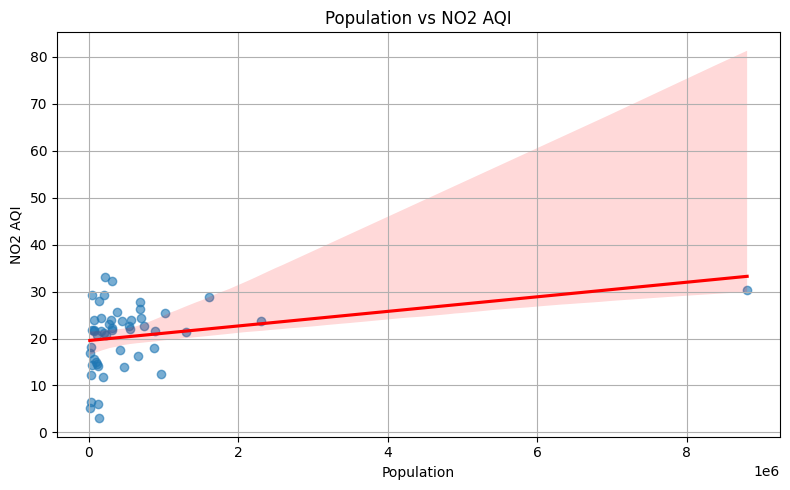

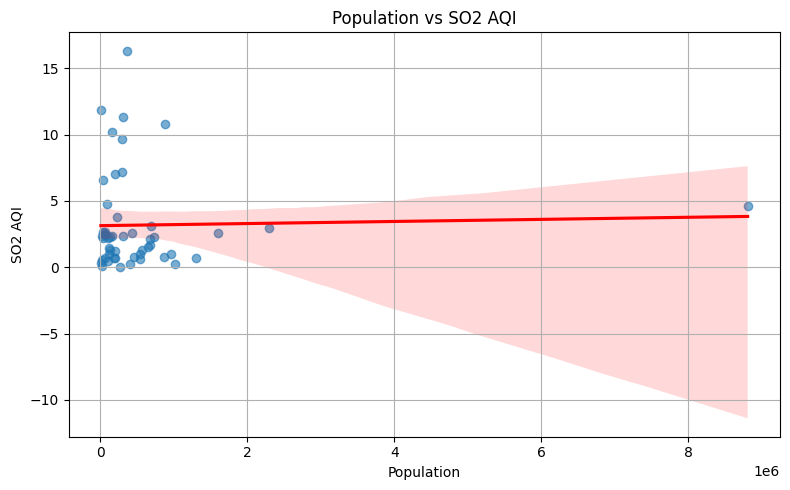

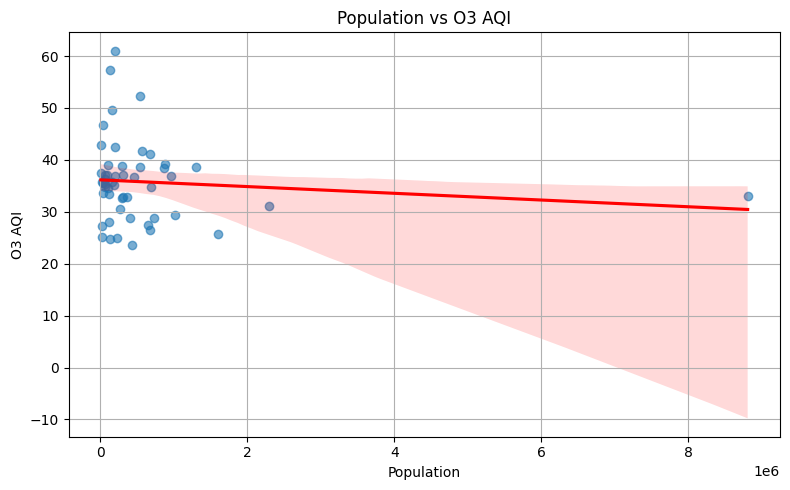

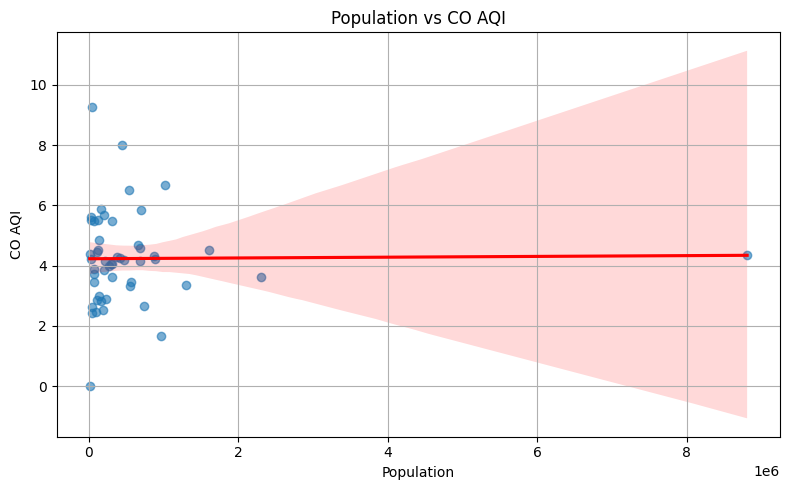

In [16]:
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8, 5))
    sns.regplot(
        x='Population', y=pollutant,
        data=city_summary_aqi,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'Population vs {pollutant}')
    plt.xlabel('Population')
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graph 1 – Population vs NO₂ AQI

A moderate upward trend (positive correlation).

As population increases, NO₂ AQI also tends to increase noticeably.

# Graph 2 – Population vs SO₂ AQI

Almost no clear trend, and the red regression line is nearly flat.

No meaningful relationship between population and SO₂ AQI.

# Graph 3 – Population vs O₃ AQI

A slight negative trend — O₃ AQI decreases slightly as population increases.

However, this trend is very weak and not statistically significant.

# Graph 4 – Population vs CO AQI

No clear trend at all.

The regression line is flat, indicating no relationship between population and CO AQI.


# Log transforming the Population Column to reduce Skewness and better model relationships

In [19]:
# Add a new column for log-transformed population
city_summary_aqi['log_Population'] = np.log(city_summary_aqi['Population'] + 1)  # +1 to avoid log(0)

In [20]:
# Recalculate correlations with log-transformed population
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in aqi_pollutants:
    r, p = stats.pearsonr(city_summary_aqi['log_Population'], city_summary_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.449, p = 0.0010
SO2 AQI: r = 0.002, p = 0.9870
O3 AQI: r = -0.116, p = 0.4193
CO AQI: r = 0.082, p = 0.5669


Plot Population Bins

In [21]:
# Define bins for rural, suburban, urban
bins = [0, 50000, 500000, city_summary_aqi['Population'].max()]
labels = ['Rural', 'Suburban', 'Urban']

city_summary_aqi['Population_Bin'] = pd.cut(city_summary_aqi['Population'], bins=bins, labels=labels)

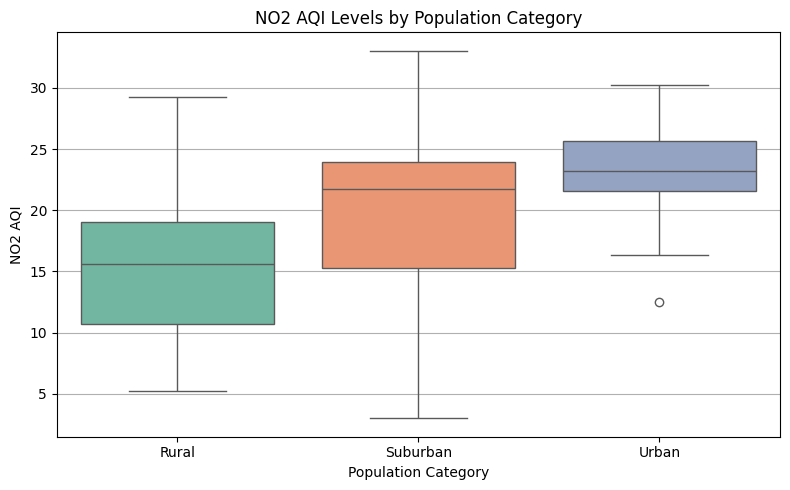

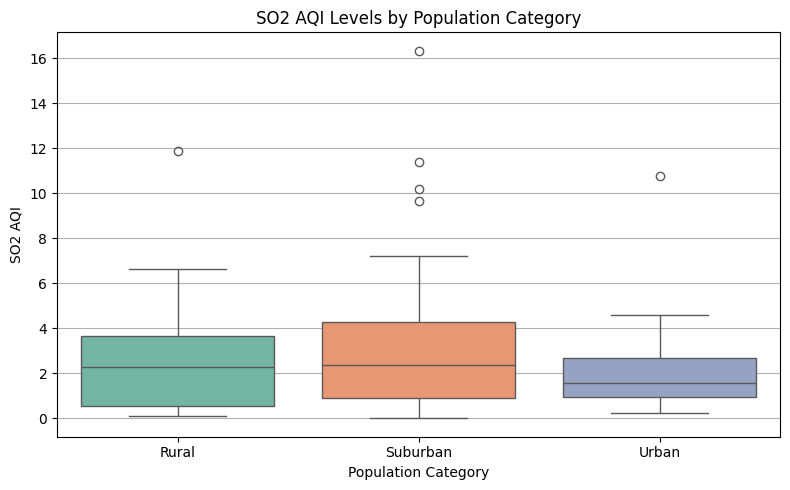

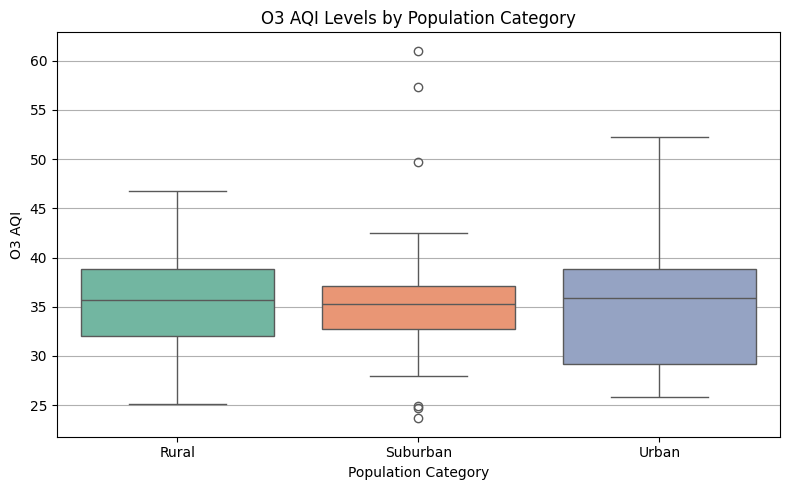

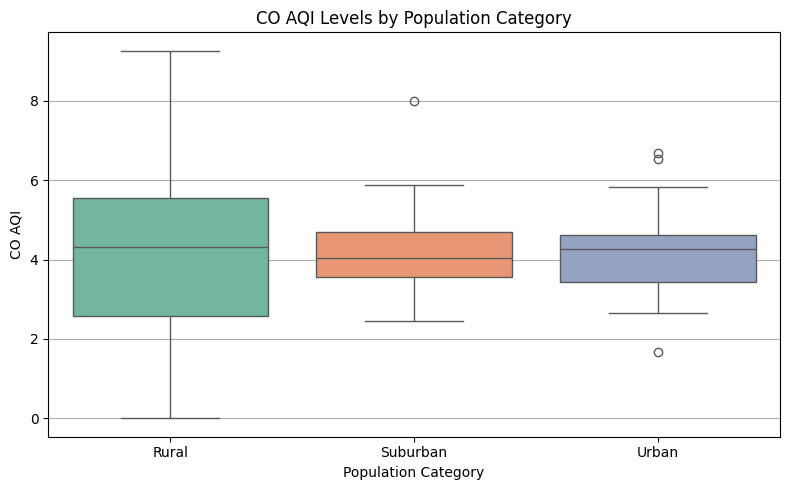

In [29]:
# Plot boxplots for each pollutant by population bin with enhanced styling
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(
        x='Population_Bin',
        y=pollutant,
        hue='Population_Bin',
        data=city_summary_aqi,
        palette='Set2',
        dodge=False
    )
    plt.title(f'{pollutant} Levels by Population Category')
    plt.xlabel('Population Category')
    plt.ylabel(pollutant)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

NO₂ AQI

Trend: Median and overall distribution of NO₂ AQI increases as you move from Rural → Suburban → Urban.

Interpretation: Urban areas tend to have higher NO₂ pollution, likely due to more traffic, industrial activity, and other urban sources.

Spread: Possibly wider variability in Urban, showing some highly polluted areas.

SO₂ AQI

Trend: Medians and distributions look fairly similar across categories.

Interpretation: SO₂ pollution levels don’t differ much by population category, indicating sources may be more evenly distributed or influenced by other factors like local industry rather than population density.

O₃ AQI

Trend: Boxplots might show small differences, but medians remain close.

Interpretation: O₃ levels do not appear strongly related to population categories in your data; may be influenced by weather or regional factors.

CO AQI

Trend: Distributions and medians very similar across Rural, Suburban, Urban.

Interpretation: CO pollution does not show clear dependency on population size in these summaries.

In [ ]:
# Create a copy to keep original safe
city_summary_aqi_clean = city_summary_aqi.copy()

# Replace spaces with underscores in columns
city_summary_aqi_clean.columns = [col.replace(' ', '_') for col in city_summary_aqi_clean.columns]

# Update pollutant list accordingly
aqi_pollutants_clean = [p.replace(' ', '_') for p in aqi_pollutants]

# Run ANOVA with clean column names
for pollutant in aqi_pollutants_clean:
    print(f"\nANOVA results for {pollutant}:")
    model = ols(f'{pollutant} ~ C(Population_Bin)', data=city_summary_aqi_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)


ANOVA results for NO2_AQI:
                        sum_sq    df         F    PR(>F)
C(Population_Bin)   297.037182   2.0  3.489016  0.038481
Residual           2043.238770  48.0       NaN       NaN

ANOVA results for SO2_AQI:
                       sum_sq    df         F    PR(>F)
C(Population_Bin)   17.532258   2.0  0.660343  0.521304
Residual           637.205794  48.0       NaN       NaN

ANOVA results for O3_AQI:
                        sum_sq    df         F    PR(>F)
C(Population_Bin)     9.961030   2.0  0.078884  0.924266
Residual           3030.575456  48.0       NaN       NaN

ANOVA results for CO_AQI:
                       sum_sq    df         F    PR(>F)
C(Population_Bin)    0.008837   2.0  0.001804  0.998197
Residual           117.541904  48.0       NaN       NaN


NO2_AQI:

F = 3.49, p = 0.0385 (< 0.05)

There is a statistically significant difference in NO2 AQI between population categories (Rural, Suburban, Urban).

This supports the idea that population density relates to NO2 air quality levels.

SO2_AQI, O3_AQI, CO_AQI:

p-values > 0.05, so no statistically significant differences in AQI across population groups for these pollutants.

No strong evidence population category influences these pollutants’ AQI.

# After creating a Boxplot and running an ANOVA test i was stuck and asked ChatGPT what the next logical step to take and it offered a Tukey's HSD (Honestly Significant Difference), what this function does from my understanding is it compares all groups of means to find which specific groups differ significantly from each others - ANOVA tells you that at least one group mean is different but doesn't specify which group but what Tukey's HSD does is pinpoint those pairs for a more accurate reading   

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in aqi_pollutants:
    print(f"\nTukey's HSD for {pollutant}:")
    tukey = pairwise_tukeyhsd(
        endog=city_summary_aqi[pollutant],           # AQI values
        groups=city_summary_aqi['Population_Bin'],   # Population categories (rural, suburban, urban)
        alpha=0.05
    )
    print(tukey.summary())


Tukey's HSD for NO2 AQI:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Rural Suburban   4.8588 0.1645 -1.4929 11.2105  False
   Rural    Urban   7.4608 0.0294  0.6282 14.2933   True
Suburban    Urban    2.602 0.4222 -2.3763  7.5802  False
--------------------------------------------------------

Tukey's HSD for SO2 AQI:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   Rural Suburban   0.3009 0.9771 -3.2462  3.848  False
   Rural    Urban  -1.0112 0.7983 -4.8268 2.8044  False
Suburban    Urban  -1.3121 0.4937 -4.0921  1.468  False
-------------------------------------------------------

Tukey's HSD for O3 AQI:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
--------------------

NO₂ AQI:

Rural vs Urban:
Mean difference = 7.46, p-adj = 0.0294 → Significant difference
Urban areas have significantly higher NO₂ AQI than rural areas.

Rural vs Suburban:
Mean difference = 4.86, p-adj = 0.1645 → Not significant

Suburban vs Urban:
Mean difference = 2.60, p-adj = 0.4222 → Not significant

Summary: The main difference in NO₂ AQI is between Rural and Urban categories, confirming that urban areas tend to have worse NO₂ pollution.

SO₂ AQI:

No significant differences between any population groups (all p-adj > 0.49).
SO₂ AQI levels are similar across rural, suburban, and urban categories.

O₃ AQI:

No significant differences between any groups (all p-adj > 0.92).
O₃ AQI is fairly consistent regardless of population category.

CO AQI:

No significant differences between any groups (all p-adj > 0.99).
CO AQI does not vary meaningfully across rural, suburban, or urban populations.

Overall:

Only NO₂ AQI shows significant differences between population categories, with urban areas having notably higher NO₂ pollution compared to rural areas.

Other pollutants (SO₂, O₃, CO) show no significant variation by population category based on this test.

# Summary

Only NO₂ AQI shows a meaningful and statistically significant increase with urbanization and population. The other pollutants (SO₂, O₃, CO) do not follow this trend in your dataset. This suggests that NO₂ is the most population-sensitive AQI pollutant in your analysis.

# Section 1

Section 1 content

---

as you can see below shows there is no any missing values into this dataset (0)

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---